In [246]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [247]:
house=pd.read_excel('Kotoku real estate final.xlsx')

In [248]:
house.head(6)

,Name of the Building,Price,address,Zip Code,Latitude,Longitude,Nearest Station,Distance from Station(min),Size,Type,Bedroom,Living,Dining,kitchen,Storage,balcony size (),year built,BUILDING AGE
0,ヴェラハイツ亀戸,2180,東京都江東区亀戸６-２４－１,City,35.695640,139.826298,ＪＲ総武線「亀戸」,4,31.50,1K,1,0,0,1,0,3.63,1978,45
1,亀戸パークハイツ,2480,東京都江東区亀戸１-１６－８,City,35.694074,139.823100,ＪＲ総武線「亀戸」,8,47.00,2LDK,2,1,1,1,0,6.77,1974,49
2,北砂４丁目住宅,2690,東京都江東区北砂４,136-0073,35.678127,139.831055,東京メトロ東西線「南砂町」,15,54.00,2LDK,2,1,1,1,0,4.50,1972,51
3,東陽町公園ハイツ壱番館 ９階,2780,東京都江東区南砂２,City,35.673079,139.822740,東京メトロ東西線「東陽町」,13,40.00,1LDK,1,1,1,1,0,5.43,1984,39
4,北砂四丁目住宅,2798,東京都江東区北砂４,136-0073,35.678127,139.831055,東京メトロ東西線「南砂町」,18,54.00,2LDK,2,1,1,1,0,4.50,1972,51
5,京ビル,2890,東京都江東区大島３,#ERROR!,35.691204,139.827857,ＪＲ総武線「亀戸」,6,45.95,2LDK,2,1,1,1,0,4.00,1989,34


In [249]:
house['price_per_m2']=house['Price']/house['Size']

In [250]:
house.head()

,Name of the Building,Price,address,Zip Code,Latitude,Longitude,Nearest Station,Distance from Station(min),Size,Type,Bedroom,Living,Dining,kitchen,Storage,balcony size (),year built,BUILDING AGE,price_per_m2
0,ヴェラハイツ亀戸,2180,東京都江東区亀戸６-２４－１,City,35.695640,139.826298,ＪＲ総武線「亀戸」,4,31.5,1K,1,0,0,1,0,3.63,1978,45,69.206349
1,亀戸パークハイツ,2480,東京都江東区亀戸１-１６－８,City,35.694074,139.823100,ＪＲ総武線「亀戸」,8,47.0,2LDK,2,1,1,1,0,6.77,1974,49,52.765957
2,北砂４丁目住宅,2690,東京都江東区北砂４,136-0073,35.678127,139.831055,東京メトロ東西線「南砂町」,15,54.0,2LDK,2,1,1,1,0,4.50,1972,51,49.814815
3,東陽町公園ハイツ壱番館 ９階,2780,東京都江東区南砂２,City,35.673079,139.822740,東京メトロ東西線「東陽町」,13,40.0,1LDK,1,1,1,1,0,5.43,1984,39,69.500000
4,北砂四丁目住宅,2798,東京都江東区北砂４,136-0073,35.678127,139.831055,東京メトロ東西線「南砂町」,18,54.0,2LDK,2,1,1,1,0,4.50,1972,51,51.814815


Text(0, 0.5, 'Price_per_m2')

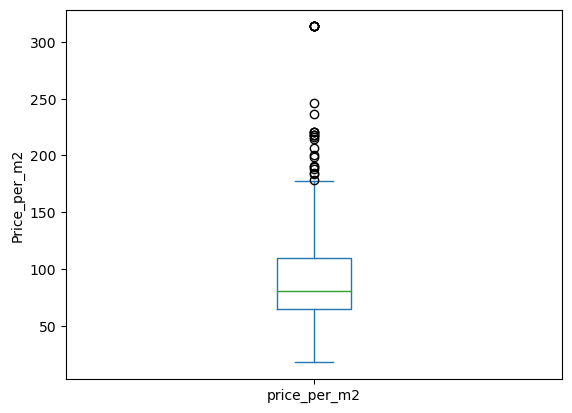

In [251]:
ax=(house['price_per_m2']).plot.box()
ax.set_ylabel('Price_per_m2')

In [252]:
binnedPrice=pd.cut(house['price_per_m2'],10)
binnedPrice.value_counts()

(47.469, 77.042]      315
(77.042, 106.614]     199
(106.614, 136.186]    120
(136.186, 165.759]     31
(17.601, 47.469]       19
(165.759, 195.331]     16
(195.331, 224.903]     11
(284.048, 313.62]       7
(224.903, 254.475]      2
(254.475, 284.048]      0
Name: price_per_m2, dtype: int64

Text(0.5, 0, 'Price per M2')

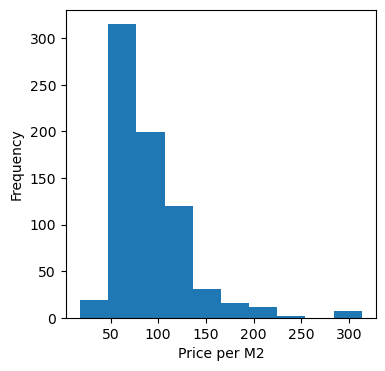

In [253]:
ax=(house['price_per_m2']).plot.hist(figsize=(4,4))
ax.set_xlabel('Price per M2')

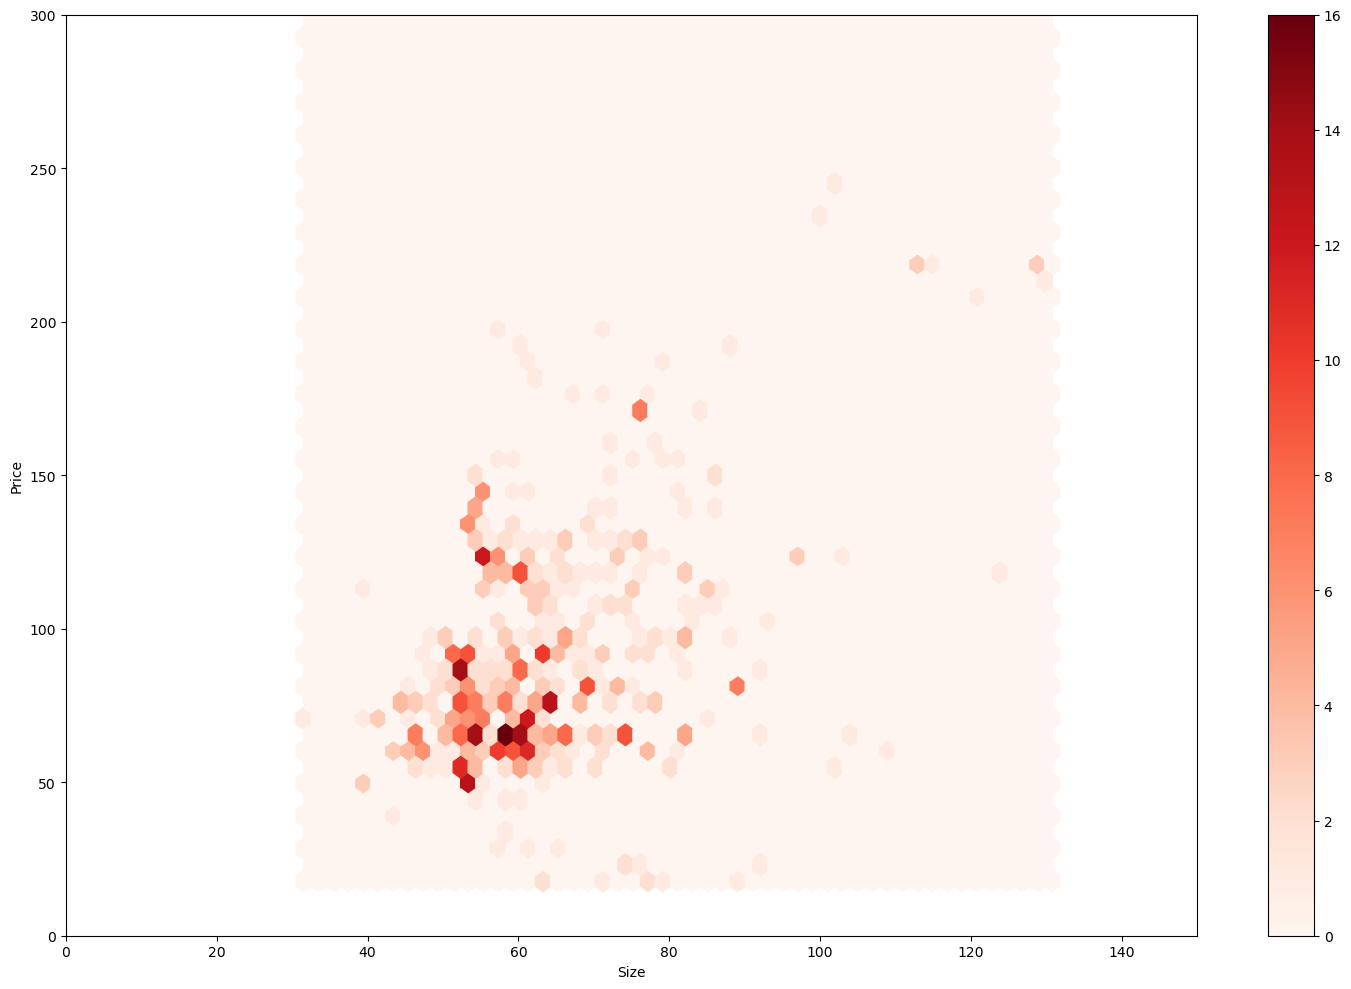

In [254]:
ax=house.plot.hexbin(x='Size',y='price_per_m2',
                     gridsize=50, sharex=False,figsize=(15,10), cmap='Reds')
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_xlim(0, 150)
ax.set_ylim(0, 300)

plt.tight_layout()

plt.show()

In [255]:
zip=pd.read_excel('Koto_with_zipcode.xlsx')
zip.columns

Index(['Longitude', 'Latitude', 'zip code'], dtype='object')

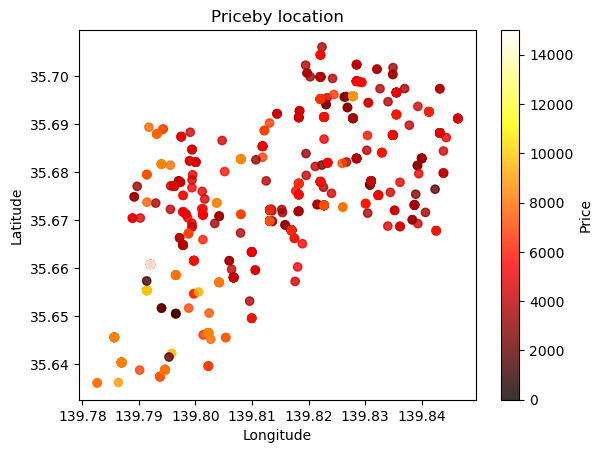

In [256]:
latitude=house['Latitude']
longitde=house['Longitude']
price=house['Price']

vmin=0
vmax=15000
plt.scatter(longitde, latitude, c=price, cmap='hot', alpha=0.8, vmin=vmin, vmax=vmax)

plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Priceby location')

plt.show()

In [257]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage

import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

In [258]:
housev = house[['Latitude', 'Longitude','Distance from Station(min)', 'Size','Bedroom','Living','Dining','kitchen','Storage',
              'balcony size ()','BUILDING AGE']]
outcome='Price'

In [259]:
predictors = ['Latitude', 'Longitude', 'Distance from Station(min)', 'Size', 'Bedroom', 'Living', 'Dining', 'kitchen', 'Storage', 'balcony size ()', 'BUILDING AGE']
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(house[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(house[variables]), model)

best_model, best_variables = stepwise_selection(predictors, train_model, score_model, verbose=True)

best_variables = best_variables.tolist()  # Convert best_variables to a list

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')



Variables: Latitude, Longitude, Distance from Station(min), Size, Bedroom, Living, Dining, kitchen, Storage, balcony size (), BUILDING AGE
Start: score=14171.29, constant
Step: score=13598.41, add Size
Step: score=13491.06, add BUILDING AGE
Step: score=13452.20, add Longitude
Step: score=13433.20, add Storage
Step: score=13421.95, add Distance from Station(min)
Step: score=13414.78, add Living
Step: score=13410.65, add Latitude
Step: score=13407.56, add Bedroom
Step: score=13407.02, add balcony size ()
Step: score=13407.02, unchanged None


AttributeError: 'list' object has no attribute 'tolist'

In [260]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     139.5
Date:                Mon, 22 May 2023   Prob (F-statistic):          4.57e-160
Time:                        16:56:41   Log-Likelihood:                -6692.1
No. Observations:                 720   AIC:                         1.341e+04
Df Residuals:                     709   BIC:                         1.346e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Latitude            

In [261]:
predictors = ['Distance from Station(min)', 'Size', 'Bedroom', 'Dining',  'Storage', 'balcony size ()', 'BUILDING AGE']
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     185.0
Date:                Mon, 22 May 2023   Prob (F-statistic):          1.49e-155
Time:                        16:56:42   Log-Likelihood:                -6710.6
No. Observations:                 720   AIC:                         1.344e+04
Df Residuals:                     712   BIC:                         1.347e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Distance from Statio

In [262]:
zip=pd.read_excel('Koto_with_zipcode.xlsx')
zip.columns

Index(['Longitude', 'Latitude', 'zip code'], dtype='object')

In [263]:
zip=zip['zip code'].str.replace('-','')

In [264]:
zip

0      1360071
1      1360071
2      1360073
3      1350015
4      1360073
        ...   
715    1350063
716    1350061
717    1350061
718    1350021
719    1360071
Name: zip code, Length: 720, dtype: object

In [265]:
house['zipcode']=zip

In [266]:
house['zipcode'].isnull().sum()

4

In [267]:
house.dropna(subset=['zipcode'],inplace=True)

In [268]:
house['zipcode'] = house['zipcode'].astype(int)
house['zipcode'].fillna(0, inplace=True)

In [269]:
pd.DataFrame(house['zipcode'].value_counts()).transpose()

,1350063,1360071,1350016,1350061,1350015,1350062,1360072,1350002,1360073,1350033,...,1310044,1350013,1360075,1350034,1350031,1358585,1350048,1300024,1350022,1350024
zipcode,99,69,55,51,47,41,38,29,28,27,...,5,4,4,4,4,2,1,1,1,1


In [270]:
predictors = ['Distance from Station(min)', 'Size', 'balcony size ()', 
              'BUILDING AGE']
outcome = 'Price'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])


zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'zipcode': house['zipcode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['zipcode'])
    .apply(lambda x: {
        'zipcode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['zipgroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()
print(zip_groups.zipgroup.value_counts().sort_index())

0    7
1    7
2    7
3    7
4    7
Name: zipgroup, dtype: int64


In [271]:
pd.DataFrame(house['zipgroup'].value_counts()).transpose()

KeyError: 'zipgroup'

In [272]:
to_join=zip_groups[['zipcode','zipgroup']].set_index('zipcode')
house=house.join(to_join, on='zipcode')
house['zipgroup']=house['zipgroup'].astype('category')

In [273]:
predictors = ['Distance from Station(min)', 'Size', 'Bedroom', 'Storage', 'balcony size ()', 'BUILDING AGE','zipgroup']
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     204.0
Date:                Mon, 22 May 2023   Prob (F-statistic):          4.64e-165
Time:                        16:56:45   Log-Likelihood:                -6651.0
No. Observations:                 716   AIC:                         1.332e+04
Df Residuals:                     708   BIC:                         1.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Distance from Statio

In [274]:
house


,Name of the Building,Price,address,Zip Code,Latitude,Longitude,Nearest Station,Distance from Station(min),Size,Type,...,Living,Dining,kitchen,Storage,balcony size (),year built,BUILDING AGE,price_per_m2,zipcode,zipgroup
0,ヴェラハイツ亀戸,2180,東京都江東区亀戸６-２４－１,City,35.695640,139.826298,ＪＲ総武線「亀戸」,4,31.50,1K,...,0,0,1,0,3.63,1978,45,69.206349,1360071,1
1,亀戸パークハイツ,2480,東京都江東区亀戸１-１６－８,City,35.694074,139.823100,ＪＲ総武線「亀戸」,8,47.00,2LDK,...,1,1,1,0,6.77,1974,49,52.765957,1360071,1
2,北砂４丁目住宅,2690,東京都江東区北砂４,136-0073,35.678127,139.831055,東京メトロ東西線「南砂町」,15,54.00,2LDK,...,1,1,1,0,4.50,1972,51,49.814815,1360073,3
3,東陽町公園ハイツ壱番館 ９階,2780,東京都江東区南砂２,City,35.673079,139.822740,東京メトロ東西線「東陽町」,13,40.00,1LDK,...,1,1,1,0,5.43,1984,39,69.500000,1350015,2
4,北砂四丁目住宅,2798,東京都江東区北砂４,136-0073,35.678127,139.831055,東京メトロ東西線「南砂町」,18,54.00,2LDK,...,1,1,1,0,4.50,1972,51,51.814815,1360073,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ブリリア有明シティタワー 27階／南東向き／２LDK…,8490,東京都江東区有明１,City,35.640373,139.786936,新交通ゆりかもめ「有明テニスの森」,9,70.63,2LDK,...,1,1,1,0,15.00,2014,9,120.203879,1350063,3
716,スカイズタワー＆ガーデン,8490,東京都江東区豊洲６,135-0061,35.645604,139.785658,新交通ゆりかもめ「新豊洲」,5,65.35,2LDK,...,1,1,1,0,11.62,2014,9,129.915838,1350061,3
717,スカイズタワー＆ガーデン,8490,東京都江東区豊洲６,#ERROR!,35.645604,139.785658,新交通ゆりかもめ「新豊洲」,4,65.35,2LDK,...,1,1,1,0,11.62,2014,9,129.915838,1350061,3
718,パークハウス清澄白河タワー,8580,東京都江東区白河４,#ERROR!,35.682697,139.808032,東京メトロ半蔵門線「清澄白河」,6,73.03,2LDK,...,1,1,1,0,11.30,2010,13,117.485965,1350021,3


In [275]:
import tensorflow as tf
from tensorflow import keras as ks

In [276]:
df=house[['Price','Distance from Station(min)', 'Size', 'Bedroom', 'Living',
       'Dining', 'Storage', 'balcony size ()',
       'BUILDING AGE', 'zipgroup']].copy()

In [277]:
X=df[['Distance from Station(min)','Size','balcony size ()','BUILDING AGE', 'zipgroup']]
y=df['Price']

In [278]:
X.shape, y.shape

((716, 5), (716,))

In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(572, 5) (144, 5) (572,) (144,)


In [280]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [281]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1000)              6000      
                                                                 
 dropout_18 (Dropout)        (None, 1000)              0         
                                                                 
 dense_25 (Dense)            (None, 500)               500500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_26 (Dense)            (None, 250)               125250    
                                                                 
 dropout_20 (Dropout)        (None, 250)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                

Epoch 46/5000
12/12 [==============================] - 0s 14ms/step - loss: 5456092.5000 - mae: 1241.7772 - val_loss: 9003467.0000 - val_mae: 1361.9010
Epoch 47/5000
12/12 [==============================] - 0s 18ms/step - loss: 5878276.5000 - mae: 1288.6979 - val_loss: 8828363.0000 - val_mae: 1343.3617
Epoch 48/5000
12/12 [==============================] - 0s 18ms/step - loss: 5595986.0000 - mae: 1270.0973 - val_loss: 9040562.0000 - val_mae: 1399.8392
Epoch 49/5000
12/12 [==============================] - 0s 13ms/step - loss: 5372921.5000 - mae: 1260.7695 - val_loss: 8327913.0000 - val_mae: 1319.1525
Epoch 50/5000
12/12 [==============================] - 0s 13ms/step - loss: 5249055.5000 - mae: 1243.1328 - val_loss: 8018318.0000 - val_mae: 1333.4677
Epoch 51/5000
12/12 [==============================] - 0s 12ms/step - loss: 5327393.0000 - mae: 1244.4584 - val_loss: 8183516.5000 - val_mae: 1365.6367
Epoch 52/5000
12/12 [==============================] - 0s 12ms/step - loss: 4923816.5000

Epoch 100/5000
12/12 [==============================] - 0s 12ms/step - loss: 3194801.5000 - mae: 1081.0077 - val_loss: 3744209.0000 - val_mae: 1064.0314
Epoch 101/5000
12/12 [==============================] - 0s 12ms/step - loss: 2854772.5000 - mae: 1065.0676 - val_loss: 3712656.5000 - val_mae: 1048.6567
Epoch 102/5000
12/12 [==============================] - 0s 11ms/step - loss: 3222203.0000 - mae: 1059.6854 - val_loss: 3413472.2500 - val_mae: 999.5840
Epoch 103/5000
12/12 [==============================] - 0s 11ms/step - loss: 3084246.0000 - mae: 1071.9568 - val_loss: 3481723.0000 - val_mae: 1022.4952
Epoch 104/5000
12/12 [==============================] - 0s 11ms/step - loss: 3155107.2500 - mae: 1082.0845 - val_loss: 3326662.7500 - val_mae: 1018.5521
Epoch 105/5000
12/12 [==============================] - 0s 12ms/step - loss: 3120984.2500 - mae: 1077.8320 - val_loss: 3309438.0000 - val_mae: 974.6875
Epoch 106/5000
12/12 [==============================] - 0s 11ms/step - loss: 2991884

Epoch 154/5000
12/12 [==============================] - 0s 11ms/step - loss: 2870249.0000 - mae: 1048.7582 - val_loss: 3059409.0000 - val_mae: 955.3136
Epoch 155/5000
12/12 [==============================] - 0s 11ms/step - loss: 2996245.2500 - mae: 1035.9578 - val_loss: 2905489.0000 - val_mae: 924.2086
Epoch 156/5000
12/12 [==============================] - 0s 10ms/step - loss: 3065727.2500 - mae: 1030.6637 - val_loss: 2983334.7500 - val_mae: 919.8859
Epoch 157/5000
12/12 [==============================] - 0s 11ms/step - loss: 2743508.0000 - mae: 1015.7816 - val_loss: 2944106.7500 - val_mae: 925.4965
Epoch 158/5000
12/12 [==============================] - 0s 11ms/step - loss: 2905264.0000 - mae: 1055.8098 - val_loss: 3099267.5000 - val_mae: 954.4473
Epoch 159/5000
12/12 [==============================] - 0s 11ms/step - loss: 2803480.2500 - mae: 974.3430 - val_loss: 2913893.7500 - val_mae: 937.5642
Epoch 160/5000
12/12 [==============================] - 0s 10ms/step - loss: 3067914.0000

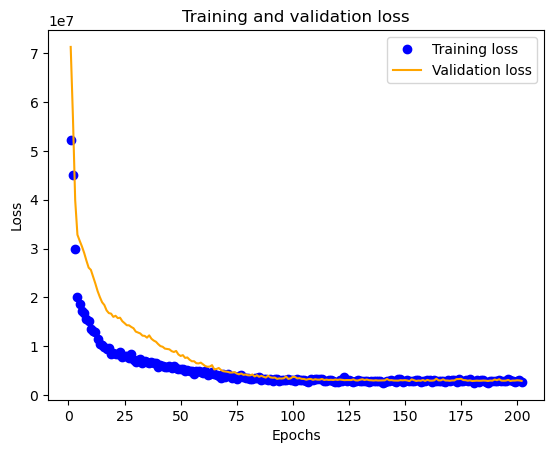

In [282]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


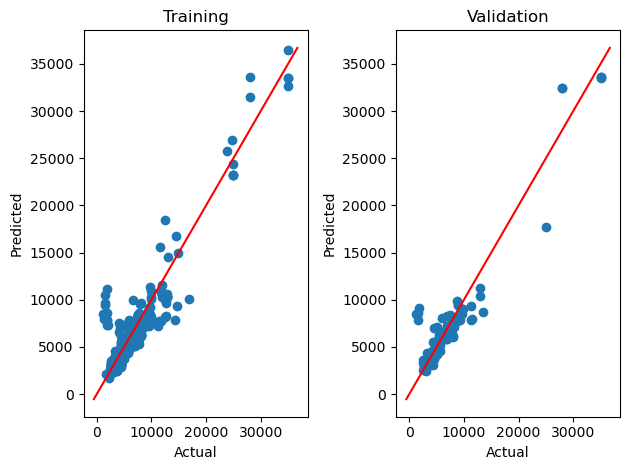

In [283]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [284]:
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

18/18 [==============================] - 0s 3ms/step
855.7216775534037
930.4998321533203


In [285]:
df.iloc[590]

Price                         7680.00
Distance from Station(min)       6.00
Size                            62.02
Bedroom                          2.00
Living                           1.00
Dining                           1.00
Storage                          0.00
balcony size ()                 15.00
BUILDING AGE                     7.00
zipgroup                         3.00
Name: 594, dtype: float64

In [286]:
test = np.array([[35.637420, 139.793727,   54.24  ,  14.61    , 4]])
test=min_max_scaler.fit_transform(test)
predictions = model.predict(test)

1/1 [==============================] - 0s 24ms/step


In [287]:
print(predictions)

[[3123.5945]]


In [288]:
house2=house[(house['zipgroup']==1)|(house['zipgroup']==0)]

In [289]:
house2

,Name of the Building,Price,address,Zip Code,Latitude,Longitude,Nearest Station,Distance from Station(min),Size,Type,...,Living,Dining,kitchen,Storage,balcony size (),year built,BUILDING AGE,price_per_m2,zipcode,zipgroup
0,ヴェラハイツ亀戸,2180,東京都江東区亀戸６-２４－１,City,35.695640,139.826298,ＪＲ総武線「亀戸」,4,31.50,1K,...,0,0,1,0,3.63,1978,45,69.206349,1360071,1
1,亀戸パークハイツ,2480,東京都江東区亀戸１-１６－８,City,35.694074,139.823100,ＪＲ総武線「亀戸」,8,47.00,2LDK,...,1,1,1,0,6.77,1974,49,52.765957,1360071,1
5,京ビル,2890,東京都江東区大島３,#ERROR!,35.691204,139.827857,ＪＲ総武線「亀戸」,6,45.95,2LDK,...,1,1,1,0,4.00,1989,34,62.894450,1360072,1
12,セブンスターマンション木場,3380,東京都江東区木場２-6-7,135-0042,35.669312,139.803417,東京メトロ東西線「木場」,2,59.58,3DK,...,0,1,1,0,9.24,1981,42,56.730446,1350042,1
13,セブンスターマンション木場,3380,東京都江東区木場２,#ERROR!,35.670826,139.804196,東京メトロ東西線「木場」,2,59.58,3DK,...,0,1,1,0,9.24,1981,42,56.730446,1350042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,ビーコンタワーレジデンス,8180,東京都江東区東雲１,#ERROR!,35.646514,139.802278,東京メトロ有楽町線「辰巳」,10,82.71,2LDK,...,1,1,1,0,12.52,2009,14,98.899770,1350062,1
710,パークタワー東雲,8200,東京都江東区東雲１,#ERROR!,35.646514,139.802278,りんかい線「東雲」,7,68.02,2LDK,...,1,1,1,0,14.61,2014,9,120.552779,1350062,1
711,プラウドタワー東雲キャナルコート,8280,東京都江東区東雲１,#ERROR!,35.646514,139.802278,東京メトロ有楽町線「豊洲」,12,75.06,2LDK,...,1,1,1,0,19.29,2012,11,110.311751,1350062,1
714,WコンフォートタワーズEast 22階住戸,8480,東京都江東区東雲１,135-0062,35.646514,139.802278,東京メトロ有楽町線「辰巳」,6,82.74,2LDK,...,1,1,1,0,12.63,2004,19,102.489727,1350062,1


In [290]:
house2

,Name of the Building,Price,address,Zip Code,Latitude,Longitude,Nearest Station,Distance from Station(min),Size,Type,...,Living,Dining,kitchen,Storage,balcony size (),year built,BUILDING AGE,price_per_m2,zipcode,zipgroup
0,ヴェラハイツ亀戸,2180,東京都江東区亀戸６-２４－１,City,35.695640,139.826298,ＪＲ総武線「亀戸」,4,31.50,1K,...,0,0,1,0,3.63,1978,45,69.206349,1360071,1
1,亀戸パークハイツ,2480,東京都江東区亀戸１-１６－８,City,35.694074,139.823100,ＪＲ総武線「亀戸」,8,47.00,2LDK,...,1,1,1,0,6.77,1974,49,52.765957,1360071,1
5,京ビル,2890,東京都江東区大島３,#ERROR!,35.691204,139.827857,ＪＲ総武線「亀戸」,6,45.95,2LDK,...,1,1,1,0,4.00,1989,34,62.894450,1360072,1
12,セブンスターマンション木場,3380,東京都江東区木場２-6-7,135-0042,35.669312,139.803417,東京メトロ東西線「木場」,2,59.58,3DK,...,0,1,1,0,9.24,1981,42,56.730446,1350042,1
13,セブンスターマンション木場,3380,東京都江東区木場２,#ERROR!,35.670826,139.804196,東京メトロ東西線「木場」,2,59.58,3DK,...,0,1,1,0,9.24,1981,42,56.730446,1350042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,ビーコンタワーレジデンス,8180,東京都江東区東雲１,#ERROR!,35.646514,139.802278,東京メトロ有楽町線「辰巳」,10,82.71,2LDK,...,1,1,1,0,12.52,2009,14,98.899770,1350062,1
710,パークタワー東雲,8200,東京都江東区東雲１,#ERROR!,35.646514,139.802278,りんかい線「東雲」,7,68.02,2LDK,...,1,1,1,0,14.61,2014,9,120.552779,1350062,1
711,プラウドタワー東雲キャナルコート,8280,東京都江東区東雲１,#ERROR!,35.646514,139.802278,東京メトロ有楽町線「豊洲」,12,75.06,2LDK,...,1,1,1,0,19.29,2012,11,110.311751,1350062,1
714,WコンフォートタワーズEast 22階住戸,8480,東京都江東区東雲１,135-0062,35.646514,139.802278,東京メトロ有楽町線「辰巳」,6,82.74,2LDK,...,1,1,1,0,12.63,2004,19,102.489727,1350062,1


Text(0, 0.5, 'Price_per_m2')

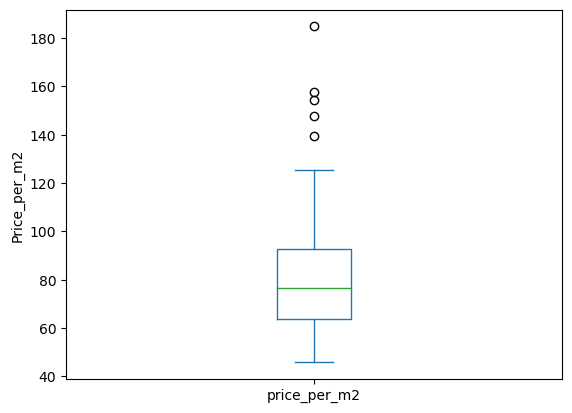

In [291]:
ax=(house2['price_per_m2']).plot.box()
ax.set_ylabel('Price_per_m2')

In [292]:
house3=house2[house2['price_per_m2']<130]
house3

,Name of the Building,Price,address,Zip Code,Latitude,Longitude,Nearest Station,Distance from Station(min),Size,Type,...,Living,Dining,kitchen,Storage,balcony size (),year built,BUILDING AGE,price_per_m2,zipcode,zipgroup
0,ヴェラハイツ亀戸,2180,東京都江東区亀戸６-２４－１,City,35.695640,139.826298,ＪＲ総武線「亀戸」,4,31.50,1K,...,0,0,1,0,3.63,1978,45,69.206349,1360071,1
1,亀戸パークハイツ,2480,東京都江東区亀戸１-１６－８,City,35.694074,139.823100,ＪＲ総武線「亀戸」,8,47.00,2LDK,...,1,1,1,0,6.77,1974,49,52.765957,1360071,1
5,京ビル,2890,東京都江東区大島３,#ERROR!,35.691204,139.827857,ＪＲ総武線「亀戸」,6,45.95,2LDK,...,1,1,1,0,4.00,1989,34,62.894450,1360072,1
12,セブンスターマンション木場,3380,東京都江東区木場２-6-7,135-0042,35.669312,139.803417,東京メトロ東西線「木場」,2,59.58,3DK,...,0,1,1,0,9.24,1981,42,56.730446,1350042,1
13,セブンスターマンション木場,3380,東京都江東区木場２,#ERROR!,35.670826,139.804196,東京メトロ東西線「木場」,2,59.58,3DK,...,0,1,1,0,9.24,1981,42,56.730446,1350042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,ビーコンタワーレジデンス,8090,東京都江東区東雲１,135-0062,35.646514,139.802278,東京メトロ有楽町線「辰巳」,9,91.86,2LDK,...,1,1,1,0,9.46,2009,14,88.068800,1350062,1
708,ビーコンタワーレジデンス,8180,東京都江東区東雲１,#ERROR!,35.646514,139.802278,東京メトロ有楽町線「辰巳」,10,82.71,2LDK,...,1,1,1,0,12.52,2009,14,98.899770,1350062,1
710,パークタワー東雲,8200,東京都江東区東雲１,#ERROR!,35.646514,139.802278,りんかい線「東雲」,7,68.02,2LDK,...,1,1,1,0,14.61,2014,9,120.552779,1350062,1
711,プラウドタワー東雲キャナルコート,8280,東京都江東区東雲１,#ERROR!,35.646514,139.802278,東京メトロ有楽町線「豊洲」,12,75.06,2LDK,...,1,1,1,0,19.29,2012,11,110.311751,1350062,1


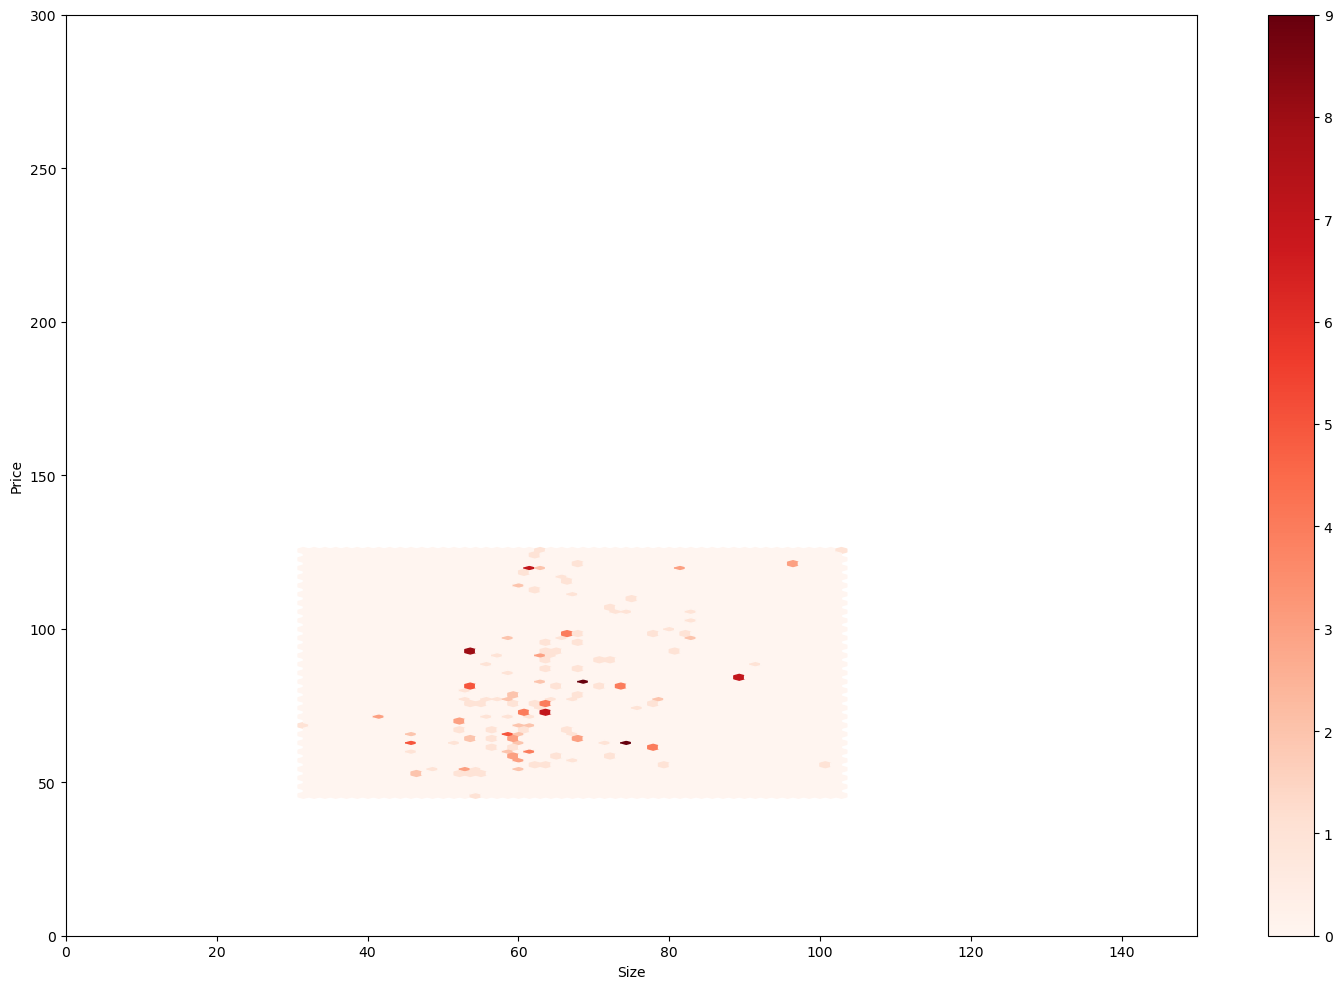

In [293]:
ax=house3.plot.hexbin(x='Size',y='price_per_m2',
                     gridsize=50, sharex=False,figsize=(15,10), cmap='Reds')
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_xlim(0, 150)
ax.set_ylim(0, 300)

plt.tight_layout()

plt.show()

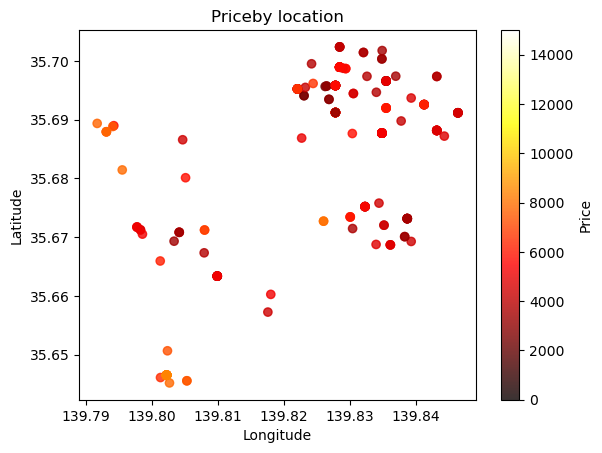

In [294]:
latitude=house3['Latitude']
longitde=house3['Longitude']
price=house3['Price']

vmin=0
vmax=15000
plt.scatter(longitde, latitude, c=price, cmap='hot', alpha=0.8, vmin=vmin, vmax=vmax)

plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Priceby location')

plt.show()

In [295]:
house2.to_excel('house3.xlsx',index=False)

In [296]:
predictors = ['Distance from Station(min)', 'Size', 'Bedroom', 'Storage', 'balcony size ()', 'BUILDING AGE','zipgroup']
model = sm.OLS(house3[outcome], house3[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     202.0
Date:                Mon, 22 May 2023   Prob (F-statistic):           2.62e-92
Time:                        16:57:19   Log-Likelihood:                -1819.2
No. Observations:                 229   AIC:                             3654.
Df Residuals:                     221   BIC:                             3682.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Distance from Statio

In [297]:
X=house3[['Distance from Station(min)', 'Size', 'Bedroom', 'Storage', 'balcony size ()', 'BUILDING AGE','zipgroup']]
y=house3['Price']

In [298]:
X.shape, y.shape

((229, 7), (229,))

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(183, 7) (46, 7) (183,) (46,)


In [300]:

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [301]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1000)              8000      
                                                                 
 dropout_21 (Dropout)        (None, 1000)              0         
                                                                 
 dense_29 (Dense)            (None, 500)               500500    
                                                                 
 dropout_22 (Dropout)        (None, 500)               0         
                                                                 
 dense_30 (Dense)            (None, 250)               125250    
                                                                 
 dropout_23 (Dropout)        (None, 250)               0         
                                                                 
 dense_31 (Dense)            (None, 1)                

Epoch 47/5000
4/4 [==============================] - 0s 19ms/step - loss: 1551720.6250 - mae: 910.8470 - val_loss: 848377.3750 - val_mae: 669.0429
Epoch 48/5000
4/4 [==============================] - 0s 19ms/step - loss: 1359923.7500 - mae: 824.4232 - val_loss: 849611.8125 - val_mae: 672.7912
Epoch 49/5000
4/4 [==============================] - 0s 19ms/step - loss: 1160430.2500 - mae: 796.0739 - val_loss: 867365.1250 - val_mae: 679.9419
Epoch 50/5000
4/4 [==============================] - 0s 19ms/step - loss: 1101124.3750 - mae: 780.1226 - val_loss: 920868.1875 - val_mae: 704.8435
Epoch 51/5000
4/4 [==============================] - 0s 19ms/step - loss: 1045299.6875 - mae: 740.6940 - val_loss: 924397.1250 - val_mae: 701.1938
Epoch 52/5000
4/4 [==============================] - 0s 19ms/step - loss: 1037176.1250 - mae: 782.5282 - val_loss: 810997.5000 - val_mae: 640.5131
Epoch 53/5000
4/4 [==============================] - 0s 19ms/step - loss: 1045104.8125 - mae: 753.0757 - val_loss: 810

Epoch 103/5000
4/4 [==============================] - 0s 20ms/step - loss: 932920.5000 - mae: 740.2542 - val_loss: 596106.8125 - val_mae: 575.8295
Epoch 104/5000
4/4 [==============================] - 0s 18ms/step - loss: 842649.3750 - mae: 681.8202 - val_loss: 572254.0625 - val_mae: 583.4940
Epoch 105/5000
4/4 [==============================] - 0s 20ms/step - loss: 854793.6250 - mae: 682.6469 - val_loss: 562405.3125 - val_mae: 606.1749
Epoch 106/5000
4/4 [==============================] - 0s 19ms/step - loss: 874881.8125 - mae: 689.8100 - val_loss: 574451.4375 - val_mae: 629.0147
Epoch 107/5000
4/4 [==============================] - 0s 19ms/step - loss: 691470.5625 - mae: 654.8853 - val_loss: 637028.0625 - val_mae: 561.4515
Epoch 108/5000
4/4 [==============================] - 0s 19ms/step - loss: 785838.5000 - mae: 656.1041 - val_loss: 752352.1875 - val_mae: 612.3969
Epoch 109/5000
4/4 [==============================] - 0s 19ms/step - loss: 830650.3125 - mae: 626.2631 - val_loss: 622

Epoch 159/5000
4/4 [==============================] - 0s 18ms/step - loss: 909712.0625 - mae: 694.1835 - val_loss: 485832.1875 - val_mae: 533.1683
Epoch 160/5000
4/4 [==============================] - 0s 18ms/step - loss: 701087.5625 - mae: 612.0937 - val_loss: 471785.1875 - val_mae: 535.1049
Epoch 161/5000
4/4 [==============================] - 0s 19ms/step - loss: 680011.2500 - mae: 601.4367 - val_loss: 469233.5625 - val_mae: 570.1010
Epoch 162/5000
4/4 [==============================] - 0s 20ms/step - loss: 765754.0625 - mae: 644.3995 - val_loss: 489721.4375 - val_mae: 597.0009
Epoch 163/5000
4/4 [==============================] - 0s 19ms/step - loss: 735582.0000 - mae: 640.5424 - val_loss: 670232.0625 - val_mae: 603.6180
Epoch 164/5000
4/4 [==============================] - 0s 19ms/step - loss: 932657.3750 - mae: 680.8589 - val_loss: 498067.7812 - val_mae: 526.1913
Epoch 165/5000
4/4 [==============================] - 0s 19ms/step - loss: 648297.8750 - mae: 611.2784 - val_loss: 627

Epoch 215/5000
4/4 [==============================] - 0s 19ms/step - loss: 786972.5000 - mae: 622.0851 - val_loss: 444625.5625 - val_mae: 520.0616
Epoch 216/5000
4/4 [==============================] - 0s 18ms/step - loss: 754930.8125 - mae: 639.8816 - val_loss: 455311.9688 - val_mae: 531.6516
Epoch 217/5000
4/4 [==============================] - 0s 19ms/step - loss: 723238.1875 - mae: 640.9547 - val_loss: 441243.9062 - val_mae: 524.8644
Epoch 218/5000
4/4 [==============================] - 0s 18ms/step - loss: 743042.5625 - mae: 643.5093 - val_loss: 458888.1875 - val_mae: 555.7114
Epoch 219/5000
4/4 [==============================] - 0s 18ms/step - loss: 854858.9375 - mae: 663.2191 - val_loss: 441619.7812 - val_mae: 515.1598
Epoch 220/5000
4/4 [==============================] - 0s 18ms/step - loss: 657764.1250 - mae: 617.9127 - val_loss: 439582.5938 - val_mae: 528.2715
Epoch 221/5000
4/4 [==============================] - 0s 18ms/step - loss: 695244.3750 - mae: 630.7910 - val_loss: 611

Epoch 271/5000
4/4 [==============================] - 0s 20ms/step - loss: 719870.4375 - mae: 653.6017 - val_loss: 473876.1875 - val_mae: 525.0750
Epoch 272/5000
4/4 [==============================] - 0s 19ms/step - loss: 761347.7500 - mae: 630.6944 - val_loss: 543882.0625 - val_mae: 556.9037
Epoch 273/5000
4/4 [==============================] - 0s 20ms/step - loss: 730281.0000 - mae: 636.2477 - val_loss: 426399.6562 - val_mae: 514.8033
Epoch 274/5000
4/4 [==============================] - 0s 20ms/step - loss: 801157.9375 - mae: 656.7914 - val_loss: 410233.2500 - val_mae: 488.2913
Epoch 275/5000
4/4 [==============================] - 0s 20ms/step - loss: 815866.6875 - mae: 671.1225 - val_loss: 420038.7500 - val_mae: 509.9876
Epoch 276/5000
4/4 [==============================] - 0s 20ms/step - loss: 656517.0000 - mae: 581.7980 - val_loss: 524655.5625 - val_mae: 545.4916
Epoch 277/5000
4/4 [==============================] - 0s 20ms/step - loss: 661891.4375 - mae: 612.6068 - val_loss: 449

Epoch 327/5000
4/4 [==============================] - 0s 19ms/step - loss: 761869.7500 - mae: 660.9139 - val_loss: 454395.4688 - val_mae: 527.7558
Epoch 328/5000
4/4 [==============================] - 0s 18ms/step - loss: 883232.4375 - mae: 707.1667 - val_loss: 449331.4375 - val_mae: 528.7764
Epoch 329/5000
4/4 [==============================] - 0s 18ms/step - loss: 692696.5625 - mae: 612.7905 - val_loss: 452216.9062 - val_mae: 537.7339
Epoch 330/5000
4/4 [==============================] - 0s 18ms/step - loss: 735867.1250 - mae: 634.2276 - val_loss: 465423.1250 - val_mae: 537.7518
Epoch 331/5000
4/4 [==============================] - 0s 18ms/step - loss: 627723.8750 - mae: 603.1235 - val_loss: 492624.2500 - val_mae: 549.0314
Epoch 332/5000
4/4 [==============================] - 0s 18ms/step - loss: 710111.7500 - mae: 603.7801 - val_loss: 438086.5312 - val_mae: 519.4500
Epoch 333/5000
4/4 [==============================] - 0s 18ms/step - loss: 726412.3125 - mae: 603.4139 - val_loss: 492

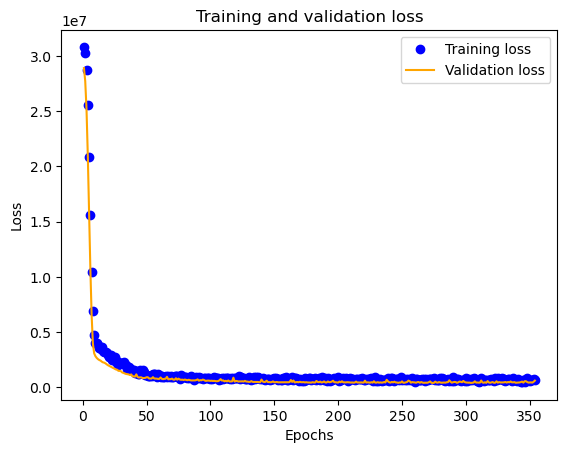

In [302]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 [==============================] - 0s 3ms/step


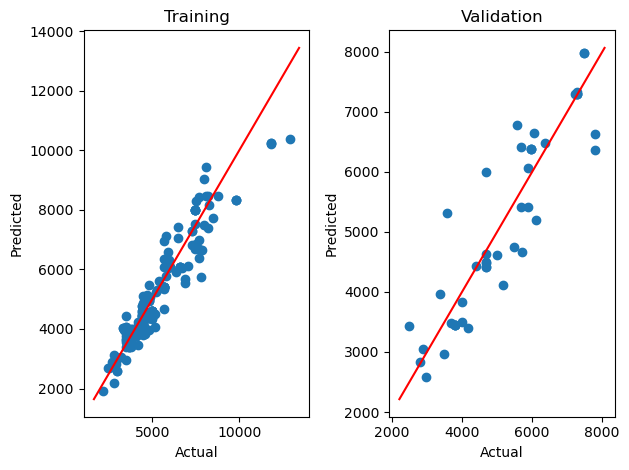

In [323]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [324]:
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

6/6 [==============================] - 0s 3ms/step
434.40295143335896
487.0146590523098


In [325]:
house3.iloc[5]

Name of the Building                   クレール亀戸
Price                                    3480
address                       東京都江東区亀戸７-30-17
Zip Code                                 City
Latitude                            35.697388
Longitude                          139.836992
Nearest Station                     ＪＲ総武線「亀戸」
Distance from Station(min)                 10
Size                                    60.57
Type                                     3LDK
Bedroom                                     3
Living                                      1
Dining                                      1
kitchen                                     1
Storage                                     0
balcony size ()                          7.14
year built                               1980
BUILDING AGE                               43
price_per_m2                        57.454185
zipcode                               1360071
zipgroup                                    1
Name: 15, dtype: object

In [329]:
# Assuming you have imported the necessary libraries and defined the model architecture

# Normalize the test data using the fitted scaler from the training data
test_data = np.array([[10, 60.57, 3, 0, 7.14, 43, 1]])  # Modify the test data with the correct values and shape
test_data = min_max_scaler.transform(test_data)

# Make predictions on the test data
predictions = model.predict(test_data)
print(predictions)


1/1 [==============================] - 0s 24ms/step
[[3268.2974]]


'Distance from Station(min)', 'Size', 'Bedroom', 'Storage', 'balcony size ()', 'BUILDING AGE','zipgroup']]